<a href="https://colab.research.google.com/github/JoDeMiro/Statistics/blob/main/66_Statisztikai_alminta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kis vicces gondolat kísérlettel áltam elő.

Tegyük fel, hogy van két változónk X és Y mindkettő Normál eloszlást vagy egyenletes eloszlást követ. A kettejük kapcsolata teljesen correlalatlan a kovarianciájuk 0, de van közöttünk 20 eset, ahol $X_i = Y_i$

Tegyyük fel, hogy 20 elemű mintát veszek a fenti populációbol.

Ha a minta alapján akarok következtetést levonni a két változó köztti kapcsolatra, akkor azt fogom látni, hogy véletlen mintavétel eseténe ha a teljes populáció elemszáma 1000 akkor 20/1000 = 0.02 = az esetek 2 százalékában X és Y között kapcsolat van 98 százalékában nincs.

De ami engem jobban érdekel, hogy mi van akkor hogyha a populációban van egy sub csoport ahol a két változó között tényleges van kapcsolat, miközben a maradék részben nincs. Hogy ezt a problémát hogy lehet megfogni?

Tipukas ez az amikor egy gyógyszer hatását vizsgálják és azt találják, hogy nincs hatás, de közben meg lehet, hogy az emberek egy bizonyos kis számú csoportjában mégis volt.



In [1]:
import numpy as np


X_uni = np.random.uniform(low = 0.0, high = 1.0, size = 980)
Y_uni = np.random.uniform(low = 0.0, high = 1.0, size = 980)

In [2]:
X_lin = np.arange(0, 1, 0.05)
Y_lin = np.arange(0, 1, 0.05)

Y_lin
Y_lin.shape

(20,)

In [3]:
X = np.hstack((X_lin, X_uni))
Y = np.hstack((Y_lin, Y_uni))

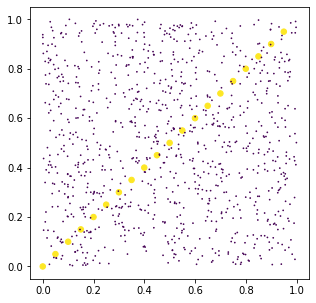

In [4]:
import matplotlib.pyplot as plt

color = np.zeros(1000)
color[0:20] = 3
size = np.full((1000,), 0.5)
size[0:20] = 30

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X, Y, c=color, s=size)
plt.show()

In [6]:
XY = np.vstack((X,Y)).T

In [87]:
id = np.zeros(1000)
id[0:20] = 1

XYI = np.column_stack((XY, id))

# XYI.shape

# XYI[0:30,:]

In [88]:
# vegyünk mintát lehetőleg visszatevés nélkül

# sanos ez a módszer többször is képes bevállasztani ugyan azt az elemet ezért nem jó,
# de azért tegyük tallonba, az se biztos, hogy baj, ha ekkora mintából többször
# is képes beválasztani egy elemet

idx = np.random.randint(1000, size=20)

# unique, counts = np.unique(idx, return_counts=True)
# dict(zip(unique, counts))

In [89]:
idx = np.random.randint(1000, size=20)

sample = XYI[idx,:]

pearsons_corr_coef = np.corrcoef(x = sample[:,0], y = sample[:,1])[0][1]

print(pearsons_corr_coef)

-0.042768846561151645


In [90]:
trial = 100
threshold_for_pearsons_corr_coef = 0.3

positive = 0
positive_sample_placeholder = []
for i in range(trial):

  idx = np.random.randint(1000, size=20)
  sample = XYI[idx,:]
  pearsons_corr_coef = np.corrcoef(x = sample[:,0], y = sample[:,1])[0][1]

  if( pearsons_corr_coef > threshold_for_pearsons_corr_coef ):
    positive += 1
    positive_sample_placeholder.append(sample)
    print(pearsons_corr_coef)

print('Sum positiv trial = ', positive)
print('Ratio of positive trial = ', (positive/trial) if positive > 0 else 0)
print('Trial = ', trial)
print('Threshold = ', threshold_for_pearsons_corr_coef)


0.530008014373695
0.4889572983935979
0.4267469889736709
0.4061540705927327
0.41896854692887486
0.6208219666330963
0.5355264356558129
0.3257186794346382
0.34170290217293425
0.30224228432455447
0.32869392077274184
0.3204609831975897
0.31897295269317494
0.3928369927688141
Sum positiv trial =  14
Ratio of positive trial =  0.14
Trial =  100
Threshold =  0.3


Szóval az alapprobléma amit próbálok megfogalmazni, hogy van a<br>
populációban egy kissebbség ahol $X = Y$ kapcsolat van.<br>
A populáció nagyobbik részében viszont $X \neq Y$.<br>
És arra vagyok kíváncsi, hogyha mintát veszünk ebből a populációból,<br>
akkor mikor találhatjuk úgy, hogy van kapcsolat a két változó között<br>
és mikor azt, hogy nincs.

Miközben az alapprobléma az, hogy mindkét állítás igaz, de hogy ez baszottul rejtve marad.

Megfordítva a dolgot -> tök érdekes lenne, ha azt vizsgálnám, hogy<br>
úgy veszek mintát, hogy legyen kapcsolat a két változó között.

Ez elő fordulhat akkor is amikor valójában nincs kapcsolat.<br>
És elő fordulhat úgy is, hogy van kapcsolat.

Miután van egy ilyen mintám -> ahol van kapcsolat, azt kell megvizsgálni,<br>
hogy az így kapott minta miben különbözik a populáció másik részétől.

Mivel alapvetően eleve mintán dolgozunk ezért itt a populáció már,<br>
maga a minta.

0.807103436740877
0.8157848210781873
0.8069742358076906
0.8317682878776725
0.8336600808271168
Sum positiv trial =  5
Ratio of positive trial =  2.5e-05
Trial =  200000
Threshold =  0.8
One is occure more than 2 =  126


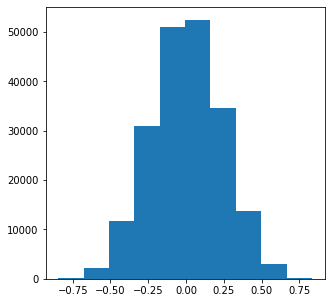

In [149]:

XYI_shuffled = XYI.copy()

np.random.shuffle(XYI_shuffled)

trial = 200000
threshold_for_pearsons_corr_coef = 0.8

positive = 0
positive_sample_placeholder = []
trial_corr_coef_placeholder = []
one_occures_more_than_2_in_sample = 0
one_occures_more_than_2_in_sample_result_placeholder = []

for i in range(trial):

  idx = np.random.randint(1000, size=20)
  sample = XYI_shuffled[idx,:]
  pearsons_corr_coef = np.corrcoef(x = sample[:,0], y = sample[:,1])[0][1]

  if( pearsons_corr_coef > threshold_for_pearsons_corr_coef ):
    positive += 1
    positive_sample_placeholder.append(sample)
    print(pearsons_corr_coef)

  trial_corr_coef_placeholder.append(pearsons_corr_coef)

  tmp = sample[np.where(sample[:,2] == 1)]
  if( tmp.shape[0] > 3):
    # print(pearsons_corr_coef)
    one_occures_more_than_2_in_sample += 1
    data = []
    data.append(tmp.shape[0])
    data.append(pearsons_corr_coef)
    data.append(tmp)
    data.append(sample)
    one_occures_more_than_2_in_sample_result_placeholder.append(data)


print('Sum positiv trial = ', positive)
print('Ratio of positive trial = ', (positive/trial) if positive > 0 else 0)
print('Trial = ', trial)
print('Threshold = ', threshold_for_pearsons_corr_coef)
print('One is occure more than 2 = ', one_occures_more_than_2_in_sample)

fig, ax = plt.subplots(figsize=(5,5))
ax.hist(trial_corr_coef_placeholder)
plt.show()

In [150]:
one_occures_more_than_2_in_sample_result_placeholder[3]

[4, 0.023492975347421483, array([[0.5 , 0.5 , 1.  ],
        [0.4 , 0.4 , 1.  ],
        [0.2 , 0.2 , 1.  ],
        [0.25, 0.25, 1.  ]]), array([[0.49547579, 0.09175234, 0.        ],
        [0.19183995, 0.71080106, 0.        ],
        [0.66536122, 0.18327686, 0.        ],
        [0.5       , 0.5       , 1.        ],
        [0.05949993, 0.2424621 , 0.        ],
        [0.39560698, 0.12666175, 0.        ],
        [0.60649711, 0.64835357, 0.        ],
        [0.10489913, 0.99981882, 0.        ],
        [0.41574953, 0.84385707, 0.        ],
        [0.35157474, 0.58305702, 0.        ],
        [0.54181803, 0.20760543, 0.        ],
        [0.85897642, 0.74935902, 0.        ],
        [0.12440464, 0.34960789, 0.        ],
        [0.52855595, 0.15492253, 0.        ],
        [0.4       , 0.4       , 1.        ],
        [0.2       , 0.2       , 1.        ],
        [0.50182187, 0.70110332, 0.        ],
        [0.46373943, 0.39930348, 0.        ],
        [0.25      , 0.25      , 1

i = 0 n = 4 	 cor = 0.39577042732293655
i = 1 n = 4 	 cor = 0.05376587778290898
i = 2 n = 5 	 cor = 0.25402187144483823
i = 3 n = 4 	 cor = 0.023492975347421483
i = 4 n = 4 	 cor = 0.39844349403845464
i = 5 n = 4 	 cor = 0.4727727940150034
i = 6 n = 4 	 cor = -0.024502455931635896
i = 7 n = 4 	 cor = 0.3252918629974962
i = 8 n = 4 	 cor = 0.1265522137072742
i = 9 n = 4 	 cor = 0.17208038755939484
i = 10 n = 4 	 cor = -0.06037353501764153
i = 11 n = 4 	 cor = 0.6053267189875945
i = 12 n = 4 	 cor = 0.05342461754810531
i = 13 n = 4 	 cor = 0.3004494771236531
i = 14 n = 4 	 cor = 0.43776285793828174
i = 15 n = 4 	 cor = 0.23065567335056933
i = 16 n = 4 	 cor = 0.003443737849513927
i = 17 n = 4 	 cor = 0.10318118493583395
i = 18 n = 4 	 cor = -0.2926177674991826
i = 19 n = 4 	 cor = 0.5725548851743509
i = 20 n = 4 	 cor = 0.1783142885524076
i = 21 n = 4 	 cor = -0.09586357952368048
i = 22 n = 4 	 cor = 0.38632644909860686
i = 23 n = 4 	 cor = -0.2079466894603736
i = 24 n = 4 	 cor = 0.3592

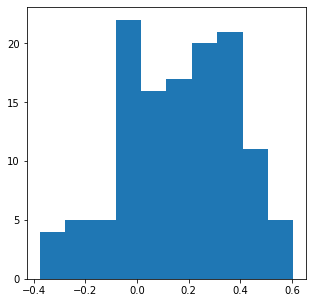

In [152]:
_cor = []
i = -1
for data in one_occures_more_than_2_in_sample_result_placeholder:
  i += 1
  print('i =', i, 'n =', data[0], '\t cor =', data[1])
  _cor.append(data[1])

fig, ax = plt.subplots(figsize=(5,5))
ax.hist(_cor)
plt.show()

In [155]:
one_occures_more_than_2_in_sample_result_placeholder[42]

[6, -0.1999751975690831, array([[0.4 , 0.4 , 1.  ],
        [0.3 , 0.3 , 1.  ],
        [0.7 , 0.7 , 1.  ],
        [0.2 , 0.2 , 1.  ],
        [0.6 , 0.6 , 1.  ],
        [0.45, 0.45, 1.  ]]), array([[0.4       , 0.4       , 1.        ],
        [0.22593142, 0.97658997, 0.        ],
        [0.46621935, 0.36202169, 0.        ],
        [0.33092099, 0.97880621, 0.        ],
        [0.09427028, 0.67747414, 0.        ],
        [0.3       , 0.3       , 1.        ],
        [0.22072952, 0.82818013, 0.        ],
        [0.32535596, 0.25338675, 0.        ],
        [0.4117036 , 0.43312082, 0.        ],
        [0.4267441 , 0.32899798, 0.        ],
        [0.37196379, 0.67686477, 0.        ],
        [0.7       , 0.7       , 1.        ],
        [0.37199045, 0.73576311, 0.        ],
        [0.2       , 0.2       , 1.        ],
        [0.92585886, 0.44318163, 0.        ],
        [0.64313121, 0.61292698, 0.        ],
        [0.6       , 0.6       , 1.        ],
        [0.20938142, 0.99

In [154]:
positive_sample_placeholder[0]

array([[0.6       , 0.6       , 1.        ],
       [0.43734129, 0.50392953, 0.        ],
       [0.41584766, 0.87185164, 0.        ],
       [0.49767321, 0.47397242, 0.        ],
       [0.47990632, 0.48998074, 0.        ],
       [0.47577412, 0.41957935, 0.        ],
       [0.43821813, 0.29558116, 0.        ],
       [0.59004954, 0.42708585, 0.        ],
       [0.05391212, 0.03337418, 0.        ],
       [0.22323653, 0.29508962, 0.        ],
       [0.10698366, 0.00688142, 0.        ],
       [0.85032934, 0.99683293, 0.        ],
       [0.45960446, 0.45402682, 0.        ],
       [0.07888261, 0.09831834, 0.        ],
       [0.15778173, 0.05573042, 0.        ],
       [0.76034561, 0.85623985, 0.        ],
       [0.6851227 , 0.37177672, 0.        ],
       [0.37199045, 0.73576311, 0.        ],
       [0.69010163, 0.5678499 , 0.        ],
       [0.79976188, 0.84981006, 0.        ]])

In [77]:
idx = np.random.randint(1000, size=20)
sample = XYI[idx,:]

f = XYI[np.where(XYI[:,2] == 1)]

f

array([[0.  , 0.  , 1.  ],
       [0.05, 0.05, 1.  ],
       [0.1 , 0.1 , 1.  ],
       [0.15, 0.15, 1.  ],
       [0.2 , 0.2 , 1.  ],
       [0.25, 0.25, 1.  ],
       [0.3 , 0.3 , 1.  ],
       [0.35, 0.35, 1.  ],
       [0.4 , 0.4 , 1.  ],
       [0.45, 0.45, 1.  ],
       [0.5 , 0.5 , 1.  ],
       [0.55, 0.55, 1.  ],
       [0.6 , 0.6 , 1.  ],
       [0.65, 0.65, 1.  ],
       [0.7 , 0.7 , 1.  ],
       [0.75, 0.75, 1.  ],
       [0.8 , 0.8 , 1.  ],
       [0.85, 0.85, 1.  ],
       [0.9 , 0.9 , 1.  ],
       [0.95, 0.95, 1.  ]])